   instant     dteday  season  yr  mnth  hr  holiday   weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0  Saturday           0   
1        2 2011-01-01       1   0     1   1        0  Saturday           0   
2        3 2011-01-01       1   0     1   2        0  Saturday           0   
3        4 2011-01-01       1   0     1   3        0  Saturday           0   
4        5 2011-01-01       1   0     1   4        0  Saturday           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  hour  \
0           1  0.24  0.2879  0.81        0.0       3          13   16     0   
1           1  0.22  0.2727  0.80        0.0       8          32   40     1   
2           1  0.22  0.2727  0.80        0.0       5          27   32     2   
3           1  0.24  0.2879  0.75        0.0       3          10   13     3   
4           1  0.24  0.2879  0.75        0.0       0           1    1     4   

   month  
0      1  
1      1  
2      1  
3      1  
4

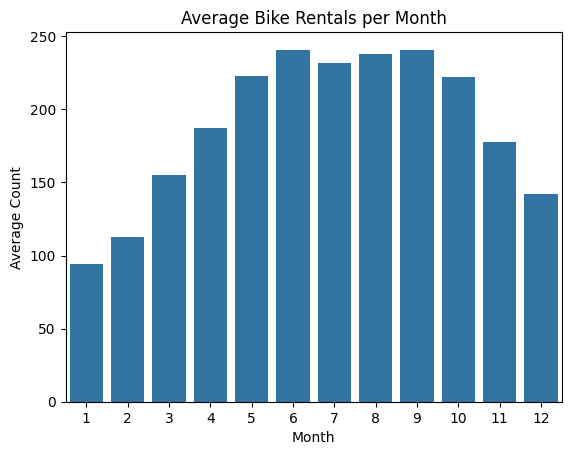

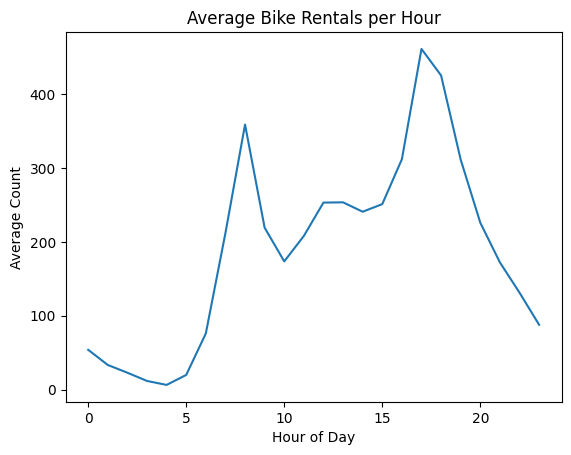

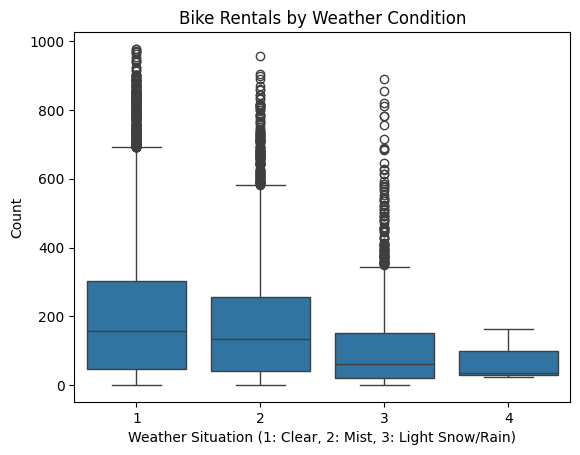

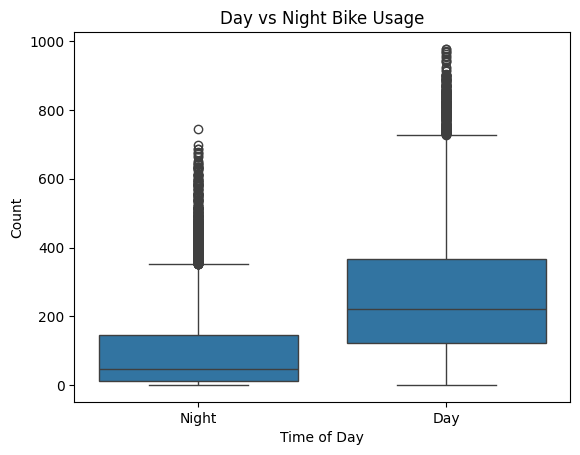

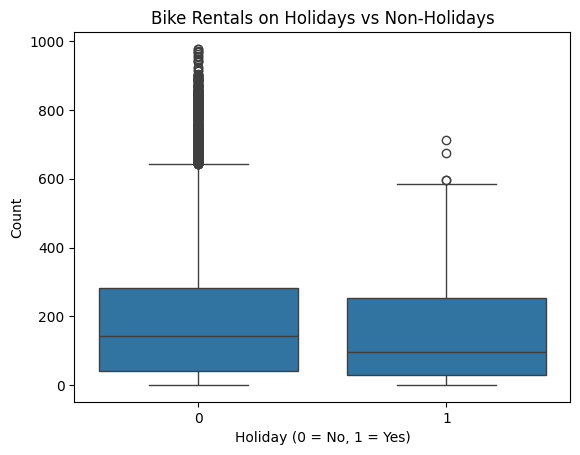

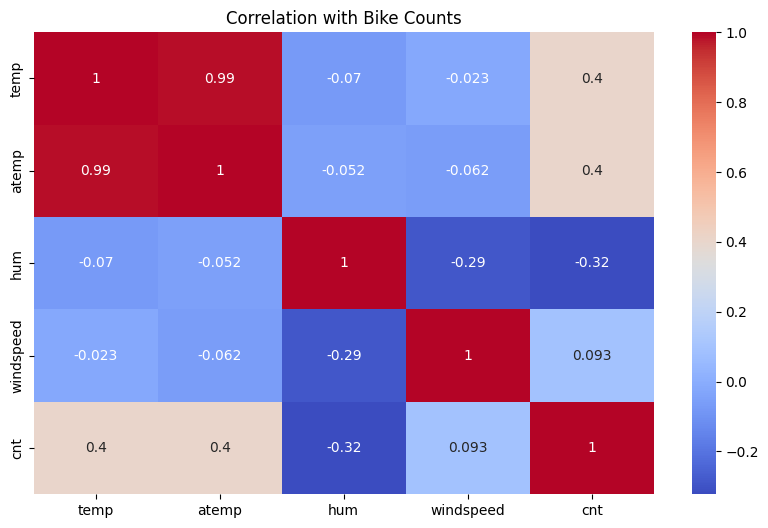

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("hour.csv")  # or use "day.csv" for daily data

# Convert datetime
df['dteday'] = pd.to_datetime(df['dteday'])
df['hour'] = df['hr']
df['month'] = df['dteday'].dt.month
df['weekday'] = df['dteday'].dt.day_name()

# Basic Overview
print(df.head())
print(df.describe())
print(df.info())

# ----------------------------
# 📈 Seasonal Trend Analysis
# ----------------------------

# Monthly usage
monthly_counts = df.groupby('month')['cnt'].mean()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Average Bike Rentals per Month")
plt.xlabel("Month")
plt.ylabel("Average Count")
plt.show()

# Hourly trend
hourly_counts = df.groupby('hour')['cnt'].mean()
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values)
plt.title("Average Bike Rentals per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.show()

# ----------------------------
# 🌤️ Weather Impact
# ----------------------------

# Weather condition effect
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title("Bike Rentals by Weather Condition")
plt.xlabel("Weather Situation (1: Clear, 2: Mist, 3: Light Snow/Rain)")
plt.ylabel("Count")
plt.show()

# ----------------------------
# 🌙 Day vs Night Usage
# ----------------------------

df['is_daytime'] = df['hour'].apply(lambda x: 'Day' if 6 <= x <= 18 else 'Night')
sns.boxplot(x='is_daytime', y='cnt', data=df)
plt.title("Day vs Night Bike Usage")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.show()

# ----------------------------
# 🎉 Holiday Effects
# ----------------------------

sns.boxplot(x='holiday', y='cnt', data=df)
plt.title("Bike Rentals on Holidays vs Non-Holidays")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# ----------------------------
# 🧠 Correlation Matrix
# ----------------------------

plt.figure(figsize=(10, 6))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation with Bike Counts")
plt.show()
